### Install Required Dependencies

Before running the pipeline, ensure that all necessary dependencies are installed.

```bash
# Install ZenML with server functionality
%pip install "zenml[server]"

# Install the ZenML sklearn integration
!zenml integration install sklearn -y

# Install a specific version of pyparsing if needed
%pip install pyparsing==2.4.2

In [1]:
%pip install "zenml[server]"
!zenml integration install sklearn -y
%pip install pyparsing==2.4.2

import IPython

IPython.Application.instance().kernel.do_shutdown(restart=True)

w
⠦ Installing integrations...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 736.6 kB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7


{'status': 'ok', 'restart': True}

### Set Ngrok Token

To enable ZenML to run with a remote dashboard, you'll need to set up Ngrok with your authentication token. Replace the `NGROK_TOKEN` value with your personal token.

```python
# Set your Ngrok token
NGROK_TOKEN = "<YOUR_TOKEN>"


In [1]:
NGROK_TOKEN = "2leOXvPgrpSgsENdT4wyHK87Rr3_3BwAkrcZSw2XoBZR3VVzz"

### Set Up Ngrok in Google Colab

To ensure that the ZenML dashboard works properly in Google Colab, you'll need to install and configure Ngrok.

```python
from zenml.environment import Environment

# Check if the environment is Google Colab
if Environment.in_google_colab():
    # Install the pyngrok package
    !pip install pyngrok
    
    # Authenticate Ngrok with your token
    !ngrok authtoken {NGROK_TOKEN}


In [2]:
from zenml.environment import Environment
if Environment.in_google_colab():
  !pip install pyngrok
  !ngrok authtoken {NGROK_TOKEN}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


### Initialize ZenML in the Colab Environment

Before starting with ZenML pipelines, you need to set up a ZenML repository. This process involves the following steps:

1. **Remove Existing ZenML Repository**:

   This command deletes the `.zen` directory if it exists. The `.zen` directory is where ZenML stores its configuration and metadata. Removing it ensures that any previous configurations or setups are cleared, allowing you to start with a clean slate.

   ```bash
   !rm -rf .zen
### 2.Initialize a New ZenML Repository:

This command initializes a new ZenML repository in your environment. It sets up the necessary directory structure and configuration files for ZenML to manage pipelines and artifacts.

  ```bash
  !zenml init
zenml init is a ZenML command that initializes the ZenML environment.
This will create a new .zen directory with the default configuration and set up the necessary environment for ZenML to function correctly.

In [3]:
!rm -rf .zen
!zenml init

Initializing the ZenML global configuration version to 0.65.0
⠋ Initializing ZenML repository at /content.
Creating database tables
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠇ Initializing ZenML repository at /content.
⠏ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
Creating default workspace 'default' ...
Creating default stack in workspace default...
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠇ Initializing 

### Custom SVC Classifier with Training and Visualization

This script demonstrates how to use a custom classifier, `CustomSVC`, to train on the digits dataset and visualize the results.

1. **Imports**: Necessary libraries for data handling, model training, and visualization.

2. **CustomSVC Class**:
   - Inherits from `SVC` and `ClassifierMixin`.
   - Uses `SVC`'s implementation for training and prediction.

3. **train_and_visualize Function**:
   - Loads and preprocesses the digits dataset.
   - Splits data into training and testing sets.
   - Trains the `CustomSVC` model.
   - Predicts test data and calculates accuracy.
   - Visualizes sample predictions and confusion matrix.

4. **plot_sample_predictions Function**:
   - Displays sample test images with true and predicted labels.

5. **plot_confusion_matrix Function**:
   - Plots the confusion matrix to assess classifier performance.

The `train_and_visualize` function is executed to perform training and visualization.


Test accuracy: 0.99


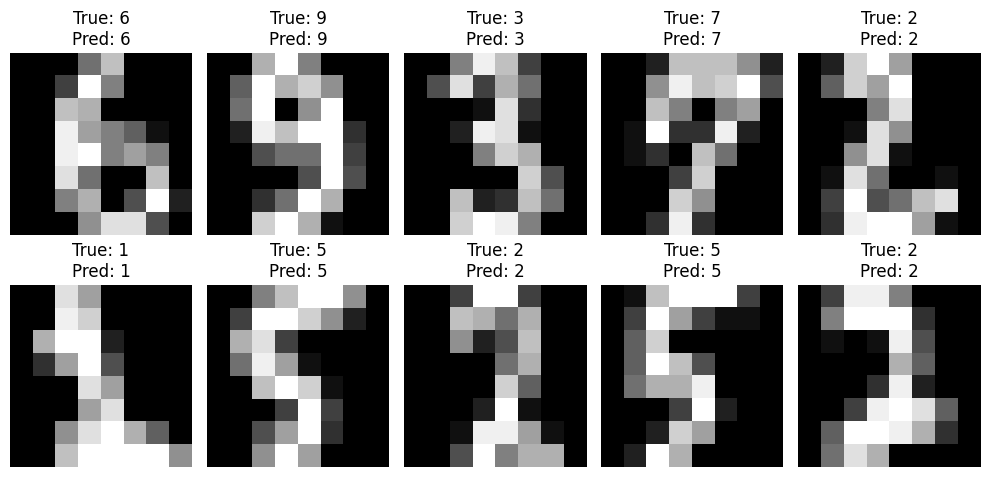

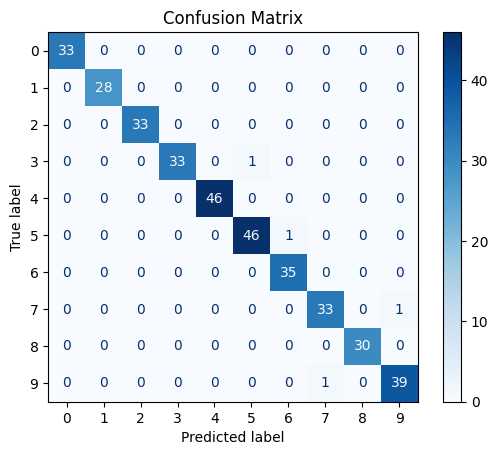

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.base import ClassifierMixin
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Custom classifier inheriting from SVC and ClassifierMixin
class CustomSVC(SVC, ClassifierMixin):
    def __init__(self, gamma=0.001):
        super().__init__(gamma=gamma)

    # No need to implement fit, predict, or score since SVC provides them
    # ClassifierMixin provides the standard API requirements for classification


def train_and_visualize() -> None:
    # Load digits dataset
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))

    # Split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)

    # Create and train the custom model
    model = CustomSVC()
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {test_acc:.2f}")

    # Visualize some test predictions
    plot_sample_predictions(digits, X_test, y_test, y_pred)

    # Visualize the confusion matrix
    plot_confusion_matrix(y_test, y_pred)


def plot_sample_predictions(digits, X_test, y_test, y_pred):
    """Plot sample images with their true and predicted labels"""
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(y_test, y_pred):
    """Plot confusion matrix to see how well the classifier performed."""
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()


# Run the function
train_and_visualize()


### ZenML Pipeline for Digit Classification

This script sets up a ZenML pipeline to classify handwritten digits using an SVC model and visualize the results.

1. **Imports**: Necessary libraries for data handling, model training, and visualization.

2. **ZenML Steps**:

   - **`importer` Step**:
     - Loads the digits dataset and reshapes the images.
     - Splits the data into training and test sets.

   - **`svc_trainer` Step**:
     - Creates and trains an SVC model using the training data.
     - Returns the trained model.

   - **`evaluator` Step**:
     - Accepts the model and test data.
     - Makes predictions and calculates the accuracy.
     - Returns both accuracy and predictions.

   - **`visualizer` Step**:
     - Visualizes results, including sample predictions and confusion matrix.

3. **Visualization Functions**:

   - **`plot_sample_predictions`**:
     - Displays sample test images with true and predicted labels.

   - **`plot_confusion_matrix`**:
     - Plots a heatmap of the confusion matrix to show classification performance.

This pipeline performs data import, model training, evaluation, and visualization of results.


In [14]:
from zenml import step, pipeline
from typing_extensions import Annotated
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.base import ClassifierMixin
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

# Step to import and split the data
@step
def importer() -> Tuple[
    Annotated[np.ndarray, "X_train"],
    Annotated[np.ndarray, "X_test"],
    Annotated[np.ndarray, "y_train"],
    Annotated[np.ndarray, "y_test"],
]:
    # Load the digits dataset
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
    return X_train, X_test, y_train, y_test

# Step to train the SVC model
@step
def svc_trainer(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    # Create and train the SVC model
    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)
    return model

# Step to evaluate the model
@step
def evaluator(
    X_test: np.ndarray,
    y_test: np.ndarray,
    model: ClassifierMixin,  # Accept model
) -> Tuple[float, np.ndarray]:
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model on the test set and print accuracy
    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc:.2f}")
    return test_acc, y_pred  # Return both accuracy and predictions

# Step to visualize results
@step
def visualizer(
    X_test: np.ndarray,
    y_test: np.ndarray,
    y_pred: np.ndarray,
) -> None:
    """Visualize the results including confusion matrix and sample predictions."""

    # Plot sample predictions
    plot_sample_predictions(X_test, y_test, y_pred)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

def plot_sample_predictions(X_test: np.ndarray, y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """Plot sample images with their true and predicted labels"""
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    """Plot a Seaborn heatmap for the confusion matrix"""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title("Confusion Matrix (Seaborn Heatmap)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### ZenML Pipeline Definition for Digit Recognition

This section defines the ZenML pipeline for digit classification using an SVC model.

1. **Pipeline Definition**:

   - **`digit_recognition_pipeline`**:
     - **`importer` Step**: Loads and splits the digits dataset into training and test sets.
     - **`svc_trainer` Step**: Trains the SVC model on the training data.
     - **`evaluator` Step**: Evaluates the model on the test data, returns both accuracy and predictions.
     - **`visualizer` Step**: Visualizes sample predictions and the confusion matrix using the test data and predictions.

2. **Pipeline Output**:
   - The pipeline returns the test accuracy of the model.

This pipeline integrates the data loading, model training, evaluation, and visualization steps to provide a complete workflow for digit recognition.


In [15]:
from zenml import pipeline

@pipeline
def digit_recognition_pipeline():
    X_train, X_test, y_train, y_test = importer()
    model = svc_trainer(X_train, y_train)
    test_acc, y_pred = evaluator(X_test, y_test, model)  # Get both accuracy and predictions
    visualizer(X_test, y_test, y_pred)
    return test_acc


### Pipeline Instance Creation

This line of code creates an instance of the `digit_recognition_pipeline`:

```python
digits_svc_pipeline = digit_recognition_pipeline()


In [17]:
digits_svc_pipeline = digit_recognition_pipeline()

Initiating a new run for the pipeline: digit_recognition_pipeline.
Executing a new run.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml up.
Using cached version of importer.
Step importer has started.
Using cached version of svc_trainer.
Step svc_trainer has started.
Using cached version of evaluator.
Step evaluator has started.
Using cached version of visualizer.
Step visualizer has started.
Pipeline run has finished in 0.684s.


### Start ZenML Dashboard

This function starts the ZenML dashboard and provides access based on the environment (Google Colab or local).

1. **Function Definition**:

   - **`start_zenml_dashboard(port=8237)`**:
     - **`port`**: The port on which the ZenML dashboard will run (default is 8237).

2. **Google Colab Environment**:
   - If running in Google Colab, it uses `pyngrok` to create a secure tunnel to the local port.
   - **`ngrok.connect(port)`**: Establishes the tunnel and returns a public URL.
   - Prints the public URL to access the ZenML dashboard from Colab.
   - Runs `!zenml up --blocking --port {port}` to start the dashboard and block the execution until it is stopped.

3. **Local Environment**:
   - If not in Colab, it starts the ZenML dashboard directly using `!zenml up --port {port}` without blocking.

4. **Function Call**:

   ```python
   start_zenml_dashboard()


In [ ]:
from zenml.environment import Environment

def start_zenml_dashboard(port=8237):
    if Environment.in_google_colab():
        from pyngrok import ngrok
        public_url = ngrok.connect(port)
        # Corrected ANSI escape codes for color formatting
        print(f"\033[31mIn Colab, use this URL instead: {public_url}\033[0m")
        !zenml up --blocking --port {port}
    else:
        !zenml up --port {port}

start_zenml_dashboard()


INFO:pyngrok.ngrok:Opening tunnel named: http-8237-d46632f7-31e9-470b-911a-b81c3d058b8f


Opening tunnel named: http-8237-d46632f7-31e9-470b-911a-b81c3d058b8f


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="no configuration paths supplied"


t=2024-09-08T12:07:49+0000 lvl=info msg="no configuration paths supplied"


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


t=2024-09-08T12:07:49+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


t=2024-09-08T12:07:49+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


t=2024-09-08T12:07:49+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="client session established" obj=tunnels.session


t=2024-09-08T12:07:49+0000 lvl=info msg="client session established" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="tunnel session started" obj=tunnels.session


t=2024-09-08T12:07:49+0000 lvl=info msg="tunnel session started" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg=start pg=/api/tunnels id=ca6f94380e946aba


t=2024-09-08T12:07:49+0000 lvl=info msg=start pg=/api/tunnels id=ca6f94380e946aba


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg=end pg=/api/tunnels id=ca6f94380e946aba status=200 dur=260.66µs


t=2024-09-08T12:07:49+0000 lvl=info msg=end pg=/api/tunnels id=ca6f94380e946aba status=200 dur=260.66µs


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg=start pg=/api/tunnels id=80f499bbf2041264


t=2024-09-08T12:07:49+0000 lvl=info msg=start pg=/api/tunnels id=80f499bbf2041264


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg=end pg=/api/tunnels id=80f499bbf2041264 status=200 dur=89.98µs


t=2024-09-08T12:07:49+0000 lvl=info msg=end pg=/api/tunnels id=80f499bbf2041264 status=200 dur=89.98µs


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg=start pg=/api/tunnels id=87d176fa7e10c330


t=2024-09-08T12:07:49+0000 lvl=info msg=start pg=/api/tunnels id=87d176fa7e10c330


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-d46632f7-31e9-470b-911a-b81c3d058b8f addr=http://localhost:8237 url=https://9a06-34-172-87-242.ngrok-free.app


In Colab, use this URL instead: NgrokTunnel: "https://9a06-34-172-87-242.ngrok-free.app" -> "http://localhost:8237"
t=2024-09-08T12:07:49+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-d46632f7-31e9-470b-911a-b81c3d058b8f addr=http://localhost:8237 url=https://9a06-34-172-87-242.ngrok-free.app


INFO:pyngrok.process.ngrok:t=2024-09-08T12:07:49+0000 lvl=info msg=end pg=/api/tunnels id=87d176fa7e10c330 status=201 dur=27.186681ms


t=2024-09-08T12:07:49+0000 lvl=info msg=end pg=/api/tunnels id=87d176fa7e10c330 status=201 dur=27.186681ms
The local ZenML dashboard is about to deploy in a blocking process. You can connect to it using the 
'default' username and an empty password.
Deploying a local ZenML server with name 'local'.
Initializing the ZenML global configuration version to 0.65.0
Starting ZenML Server as blocking process... press CTRL+C once to stop it.
INFO:     Started server process [5646]
INFO:     Waiting for application startup.
Not writing the global configuration to disk in a ZenML server environment.
Not writing the global configuration to disk in a ZenML server environment.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8237 (Press CTRL+C to quit)


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=397ad6b08575 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=397ad6b08575 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET / HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4e95a9f58ad3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/index-Davdjm1d.js HTTP/1.1" 200 OK
t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4e95a9f58ad3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5f099f82cf5b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5f099f82cf5b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4a6086f69ffa l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4a6086f69ffa l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6ced22cfe3c8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6ced22cfe3c8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=154ddd29cf12 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=154ddd29cf12 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=87b21e7ed134 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=87b21e7ed134 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6a5363736e74 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6a5363736e74 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9d133907ffbf l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9d133907ffbf l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d19bcdb5f81b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d19bcdb5f81b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ebbb7a9cd82e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ebbb7a9cd82e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=df7c11a57acf l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=df7c11a57acf l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0fcac030c74c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0fcac030c74c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f604470e1c11 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f604470e1c11 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=25ec25fccc03 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=25ec25fccc03 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0bbd360f48eb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0bbd360f48eb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=afae75bc407b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=afae75bc407b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=8cec29a300fc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=8cec29a300fc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2beaf9fac53c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2beaf9fac53c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c7912e728d39 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c7912e728d39 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d93d33e7cf46 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d93d33e7cf46 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f431428bbb23 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f431428bbb23 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=036b1df1dbc0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=036b1df1dbc0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e9786da60dd4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e9786da60dd4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4a1b0745f4ce l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4a1b0745f4ce l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=79c519dc5ec7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=79c519dc5ec7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f38a7bbc0629 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f38a7bbc0629 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=054e34a91fdb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=054e34a91fdb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=67d15308f0a4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=67d15308f0a4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2ea8e6a7a382 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2ea8e6a7a382 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0ba340650557 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0ba340650557 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ac651d8c42bb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ac651d8c42bb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=16208b16634d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=16208b16634d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=425e3f3335a5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=425e3f3335a5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=09db5e9a3352 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=09db5e9a3352 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=073e300c9d2d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=073e300c9d2d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=b3087b24f52b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=b3087b24f52b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/%40reactflow-C26Olbza.css HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-ext-400-normal-D3W-OpO-.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/%40tanstack-QbMbTrh5.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/%40reactflow-IuMOnBUC.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/%40react-router-APVeuk-U.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/%40radix-DnFH_oo1.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=de1ab27a2ace l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=de1ab27a2ace l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cb90f458da29 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cb90f458da29 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e3e30225a7ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e3e30225a7ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=23e078d0f2b3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=23e078d0f2b3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1e747e70388e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1e747e70388e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=228f60dc4937 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=228f60dc4937 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=81c57465fc37 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=81c57465fc37 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=7e170d2e0391 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=7e170d2e0391 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a9cb08c078da l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a9cb08c078da l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9bbdb4f159b5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9bbdb4f159b5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=7c11c0b7aed1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=7c11c0b7aed1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0b05d748b5e5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0b05d748b5e5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=bdc26d9bf5a3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=bdc26d9bf5a3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=50f79504d9e4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=50f79504d9e4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=8cae155d473b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=8cae155d473b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1b150dbd31e1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1b150dbd31e1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2026afa13365 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2026afa13365 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4c43cc0edc85 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4c43cc0edc85 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e6eec04de209 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e6eec04de209 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=039beb4708fb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=039beb4708fb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6ac82a9ddfce l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6ac82a9ddfce l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a84e54bf17d5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a84e54bf17d5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d65e1dfc2db0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d65e1dfc2db0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9e7238f53608 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9e7238f53608 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0d6d5a178f82 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0d6d5a178f82 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5dad623c96c4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5dad623c96c4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a6a1f8fa4439 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a6a1f8fa4439 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4b15039df2e3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4b15039df2e3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=bcb1b4b332eb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=bcb1b4b332eb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2e2b10eee7d3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2e2b10eee7d3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=97a87a0e2536 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=97a87a0e2536 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=46a1fcc4128c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=46a1fcc4128c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c871861e4587 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c871861e4587 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=663ef3f0a2a6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=663ef3f0a2a6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f9f3aeb47d84 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=f9f3aeb47d84 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ce3577c685ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ce3577c685ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=64f90c05b36d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=64f90c05b36d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cfeac27dd26d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cfeac27dd26d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c026309ffdab l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c026309ffdab l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=768ea2963f43 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=768ea2963f43 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c920bd1e989d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c920bd1e989d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=fdd7149045a2 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/index-CsIuf3i6.css HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-ext-500-normal-B9u8Q_zH.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-cyrillic-500-normal-BRrLR67x.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-400-normal-BT1H-PT_.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-cyrillic-ext-400-normal-tyfMZHQw.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-vietnamese-400-normal-Cnt0N5Vm.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-greek-ext-400-normal-CIdlr5YK.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-greek-ext-500-normal-2pdUafRD.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:

INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=083f8cdfad44 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=083f8cdfad44 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=59470efbd676 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=59470efbd676 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2a6e6192f2f0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2a6e6192f2f0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=63dbfb81c3a7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=63dbfb81c3a7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e8b8e3ac1d79 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e8b8e3ac1d79 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0cbbca863515 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0cbbca863515 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c0c70ce6204a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c0c70ce6204a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9bb54bc1568b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9bb54bc1568b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=02d364a8c0fa l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=02d364a8c0fa l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a32be09ac6f3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a32be09ac6f3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d9b88c11329e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d9b88c11329e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1d2c92d09354 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1d2c92d09354 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d68960c46e30 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d68960c46e30 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c9a648444c70 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c9a648444c70 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=743b364ecc41 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=743b364ecc41 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e21c242b5982 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e21c242b5982 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4358635a0c5a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4358635a0c5a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a01b96233306 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a01b96233306 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cfecfe719716 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cfecfe719716 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=26b2494f9ba4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=26b2494f9ba4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d30a34cd4a64 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=d30a34cd4a64 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4fd1687d0315 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4fd1687d0315 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c4b2ae4c46a8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c4b2ae4c46a8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=3120183af7ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=3120183af7ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6a719b20ab9c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6a719b20ab9c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1dbd0637e505 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=1dbd0637e505 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=40e9ca3bf520 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=40e9ca3bf520 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=eae5bdd4413d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=eae5bdd4413d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=41efba047f0c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=41efba047f0c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=90c78486c337 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=90c78486c337 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c70e50def616 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c70e50def616 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=b93b43811e9c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=b93b43811e9c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-500-normal-D4I8BKCx.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-cyrillic-ext-400-normal-CzG7Kr3z.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-greek-600-normal-B-l8Lzzd.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-600-normal-Dbvh0wvx.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-ext-500-normal-SuUkSNTU.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-400-normal-Cdi8t5Mu.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-ext-400-normal-8tIzm-yw.woff HTTP/1.1" 2

INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=7cf1b79865eb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=7cf1b79865eb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5b8135401c25 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5b8135401c25 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=283aa5d52157 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=283aa5d52157 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9c7bf217c083 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9c7bf217c083 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=8768f82d4ae7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=8768f82d4ae7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=b208a446d398 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=b208a446d398 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ced069925f05 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ced069925f05 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0bfd86d37a03 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0bfd86d37a03 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ae54f27144d4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ae54f27144d4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=afa3936f3fe7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=afa3936f3fe7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0b1538917522 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0b1538917522 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=69babd561ab7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=69babd561ab7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2822d7898524 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2822d7898524 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0758e65458b1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0758e65458b1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ba6a08a41371 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ba6a08a41371 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=465648097b78 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=465648097b78 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=57d9927886ec l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=57d9927886ec l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=989a950f4f7e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=989a950f4f7e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=78dcef95860f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=78dcef95860f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ff4b44e4f409 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=ff4b44e4f409 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=702839124557 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=702839124557 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c7076ffd3fe6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c7076ffd3fe6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5a29f338f8cb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5a29f338f8cb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2516c4ab1c6e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2516c4ab1c6e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=312347fcdd36 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=312347fcdd36 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4f42f6918f69 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=4f42f6918f69 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0562f3203439 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=0562f3203439 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e85fc3efb17a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=e85fc3efb17a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=3b53392bc3f0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=3b53392bc3f0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=3f595bf5ccdb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=3f595bf5ccdb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a754fbce395c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=a754fbce395c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6ec4cc170295 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=6ec4cc170295 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c5300fc69c7b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=c5300fc69c7b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=85a05b551380 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=85a05b551380 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=97cbf360127f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=97cbf360127f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9f6358de0586 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=9f6358de0586 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=748671bf00c0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=748671bf00c0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cd4006ba7ea3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=cd4006ba7ea3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=79542104343a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=79542104343a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=04f54f65f69b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=04f54f65f69b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5676604863ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=5676604863ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=96b4e0df4c93 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=96b4e0df4c93 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2cf1aec88867 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:13+0000 lvl=info msg="join connections" obj=join id=2cf1aec88867 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-greek-ext-600-normal-BmtRFZgT.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/repos-video-D8kpu60k.svg HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/alex-DcCuDHPg.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/metaflow-weOkWNyT.svg HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-600-normal-B2Ssfs8e.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-vietnamese-600-normal-BQ_dbMbg.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-greek-500-normal-BjpBGs91.woff HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e

INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:15+0000 lvl=info msg="join connections" obj=join id=8afb663295fb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:15+0000 lvl=info msg="join connections" obj=join id=8afb663295fb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /favicon.ico HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/index.esm-BE1uqCX5.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/login-mutation-TIWnZoJ7.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:15+0000 lvl=info msg="join connections" obj=join id=38c733467cbe l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/zod-uFd1wBcd.js HTTP/1.1" 200 OK
t=2024-09-08T12:08:15+0000 lvl=info msg="join connections" obj=join id=38c733467cbe l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-600-normal-B2Ssfs8e.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-500-normal-kWhwEdDH.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "POST /api/v1/login HTTP/1.1" 200 OK
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:20+0000 lvl=info msg="join connections" obj=join id=282264c8ca8a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/page-BSkbj719.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
t=2024-09-08T12:08:20+0000 lvl=info msg="join connections" obj=join id=282264c8ca8a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=766b77eccdae l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/inter-latin-400-normal-BT1H-PT_.woff2 HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/form-schemas-DD4OppNK.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/url-DNHuFfYx.js HTTP/1.1" 200 OK
t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=766b77eccdae l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=864394245680 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=864394245680 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=eb0e6fb3e2a1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=eb0e6fb3e2a1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=c600653f2e57 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=c600653f2e57 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=57d57a7082e8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=57d57a7082e8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=f5446021da22 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:21+0000 lvl=info msg="join connections" obj=join id=f5446021da22 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/UsageReason-DbgUeRkI.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/gcp-Dj6ntk0L.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/check-circle-DOoS4yhF.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/rocket-SESCGQXm.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/kubernetes-BjbR6D-1.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/UpdatePasswordSchemas-BKyR7Eqi.js HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:32+0000 lvl=info msg="join connections" obj=join id=0ca47f1b4bb1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:32+0000 lvl=info msg="join connections" obj=join id=0ca47f1b4bb1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "PUT /api/v1/current-user HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=40b7473a72fe l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/adam-e-y0WnB_.webp HTTP/1.1" 200 OK
t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=40b7473a72fe l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=35903df3d93d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/alex-DcCuDHPg.webp HTTP/1.1" 200 OK
t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=35903df3d93d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=e7dea34782e6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=e7dea34782e6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=1c57d8df9080 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=1c57d8df9080 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/stefan-B08Ftbba.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/baris-C0ZrZ10g.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/hamza-NKKOZz1I.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/adam-e-y0WnB_.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/baris-C0ZrZ10g.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/stefan-B08Ftbba.webp HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=2f0ce5220dd0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/hamza-NKKOZz1I.webp HTTP/1.1" 200 OK
t=2024-09-08T12:08:33+0000 lvl=info msg="join connections" obj=join id=2f0ce5220dd0 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/CodeSnippet-Bbx6fIb6.css HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/tour-cover-BYfeen6M.webp HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/page-OmVfClGH.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=4feecb8d30d3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/package-DYKZ5jKW.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/chevron-down-Cwb-W_B_.js HTTP/1.1" 200 OK
t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=4feecb8d30d3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=d92e6f5a1690 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=d92e6f5a1690 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=13802eb56d25 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=13802eb56d25 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=f290afba9390 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=f290afba9390 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=db5a61abb473 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=db5a61abb473 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=5b68bc1b3d0b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=5b68bc1b3d0b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=e4a4d76b544e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=e4a4d76b544e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=7a56c715fdeb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:35+0000 lvl=info msg="join connections" obj=join id=7a56c715fdeb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/plus-Bc8eLSDM.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/Helpbox-C96LeSX9.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/Tick-DEACFydX.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/copy-CaGlDsUy.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/help-CwN931fX.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/terminal-DRIPb4oF.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/chevron-right-double-c9H46Kl8.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/CodeSnippet-i_WEOWw9.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:36+0000 lvl=info msg="join connections" obj=join id=77668c9b10ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/tour-cover-BYfeen6M.webp HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
t=2024-09-08T12:08:36+0000 lvl=info msg="join connections" obj=join id=77668c9b10ea l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:36+0000 lvl=info msg="join connections" obj=join id=406511cc12b3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:36+0000 lvl=info msg="join connections" obj=join id=406511cc12b3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:36+0000 lvl=info msg="join connections" obj=join id=4460cd6fcee7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:36+0000 lvl=info msg="join connections" obj=join id=4460cd6fcee7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "PUT /api/v1/current-user HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/page-D5I0-LSs.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=54bdcade59e1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/refresh-CtPKdk2G.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/ExecutionStatus-BSQgMpzk.js HTTP/1.1" 200 OK
t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=54bdcade59e1 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=2e752bfdd006 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=2e752bfdd006 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=fa56986a2f67 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=fa56986a2f67 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=41cf9076b25d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:38+0000 lvl=info msg="join connections" obj=join id=41cf9076b25d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/CopyButton-BAYaQlWF.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/SearchField-BPNazO4G.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/dots-horizontal-C6K59vUm.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/index-5GJ5ysEZ.js HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/pipelines?page=1&sort_by=desc%3Alatest_run HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/page-CUOBhxxU.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/InlineAvatar-C2ZECnGP.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/Dis

INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=a04186fd519d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/Error-QMgFNDTs.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/CollapsibleCard-C9BzoY6q.js HTTP/1.1" 200 OK
t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=a04186fd519d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=79721691a65f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=79721691a65f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=219208d388b4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=219208d388b4 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=bb1b97821926 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=bb1b97821926 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=a1aafb5027ad l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=a1aafb5027ad l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=bdca92798a72 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:43+0000 lvl=info msg="join connections" obj=join id=bdca92798a72 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/stack-detail-query-fuuoot1D.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/docker-BFAFXr2_.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/logs-GiDJXbLS.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/EmptyState-Cs3DEmso.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/Infobox-BB7dfbrO.js HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /assets/code-browser-BJYErIjr.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:44+0000 lvl=info msg="join connections" obj=join id=bf8fcdf0ccd6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
t=2024-09-08T12:08:44+0000 lvl=info msg="join connections" obj=join id=bf8fcdf0ccd6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e/graph HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e/graph HTTP/1.1" 200 OK
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:50+0000 lvl=info msg="join connections" obj=join id=4cb8240ad2ec l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:50+0000 lvl=info msg="join connections" obj=join id=4cb8240ad2ec l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:50+0000 lvl=info msg="join connections" obj=join id=c609a09819d7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:50+0000 lvl=info msg="join connections" obj=join id=c609a09819d7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:08:50+0000 lvl=info msg="join connections" obj=join id=595db18f2bf8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:08:50+0000 lvl=info msg="join connections" obj=join id=595db18f2bf8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/steps/441e6a0b-9cd8-418a-9ced-7717f4744fef HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=3b0a9193a24f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=3b0a9193a24f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=bdae605c0f13 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=bdae605c0f13 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=c5affa23961c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=c5affa23961c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=67d389c35560 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=67d389c35560 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=4de23f17ca04 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=4de23f17ca04 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=6d25e1050b13 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=6d25e1050b13 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=cc6144102042 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:10:48+0000 lvl=info msg="join connections" obj=join id=cc6144102042 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=abe08adbe0e3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=abe08adbe0e3 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=414cecb0ae48 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=414cecb0ae48 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=701e72ec576b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=701e72ec576b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=0a2caa86a85c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=0a2caa86a85c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=471b0e529fa5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=471b0e529fa5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=324052b5e4d5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
Got token from cookie
t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=324052b5e4d5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=36a722c9ab7c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:04+0000 lvl=info msg="join connections" obj=join id=36a722c9ab7c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e/graph HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=4a994e144a32 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=4a994e144a32 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=ee3981dd72a9 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=ee3981dd72a9 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=e6036471bdcc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=e6036471bdcc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=4a2b0a819ebd l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=4a2b0a819ebd l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=fc216faff8c8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:07+0000 lvl=info msg="join connections" obj=join id=fc216faff8c8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e/graph HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=83f5c004aba7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=83f5c004aba7 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=5ce8c9daac5f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=5ce8c9daac5f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=5598769a51ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=5598769a51ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=be8a35a58f35 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=be8a35a58f35 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=d49c64be9761 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=d49c64be9761 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=2557d90c8183 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=2557d90c8183 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=fb9f863a4c7d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:11:53+0000 lvl=info msg="join connections" obj=join id=fb9f863a4c7d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=94a74056c3bb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=94a74056c3bb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=de21228975be l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=de21228975be l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=0e408c63ffe8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=0e408c63ffe8 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=e56c12dc819f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=e56c12dc819f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=71bedab00a59 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=71bedab00a59 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=a83b3e46e184 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=a83b3e46e184 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=cf5f80e88074 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:12:34+0000 lvl=info msg="join connections" obj=join id=cf5f80e88074 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=2ed4f3d3df2c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=2ed4f3d3df2c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=24f84057ff37 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=24f84057ff37 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=62d771a84e85 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=62d771a84e85 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=ef1c9a899e43 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=ef1c9a899e43 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=e53f21834948 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=e53f21834948 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=0e774a9e4498 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=0e774a9e4498 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=b8466e10a565 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:13:08+0000 lvl=info msg="join connections" obj=join id=b8466e10a565 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=62935ca3a611 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=62935ca3a611 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=fbe37051cedd l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=fbe37051cedd l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=868601bf2a2d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=868601bf2a2d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=b76847c78067 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


Got token from cookie
Got token from cookie
t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=b76847c78067 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=b67deb59e13e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=b67deb59e13e l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=ee2eb588b1d5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=ee2eb588b1d5 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=ca694e572576 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:14:14+0000 lvl=info msg="join connections" obj=join id=ca694e572576 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e/graph HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=62d4fd185d58 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=62d4fd185d58 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=f6945406c254 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=f6945406c254 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=fc25b7c9a663 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=fc25b7c9a663 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=c41e06764437 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=c41e06764437 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=a9baaed14ddc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=a9baaed14ddc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=c2055eda131b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=c2055eda131b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=2a9ac5ebc688 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:15:20+0000 lvl=info msg="join connections" obj=join id=2a9ac5ebc688 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=9d912ce07e1c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=9d912ce07e1c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=16da7102b455 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=16da7102b455 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=916d39c2c066 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=916d39c2c066 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=c463570567ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=c463570567ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=8a476347e2ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=8a476347e2ee l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=2fa83cd01b2f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=2fa83cd01b2f l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=31e24fae39fb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:16:32+0000 lvl=info msg="join connections" obj=join id=31e24fae39fb l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=bcaab6598e43 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=bcaab6598e43 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=eb9b5ea431dc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=eb9b5ea431dc l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=a932654a4775 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=a932654a4775 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=10e2e72e487d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=10e2e72e487d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=efa3d227cf0a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=efa3d227cf0a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=edf0023c0a45 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=edf0023c0a45 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=1da0c1381655 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:19:51+0000 lvl=info msg="join connections" obj=join id=1da0c1381655 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=f0946c9c247d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=f0946c9c247d l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=08174b93c154 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=08174b93c154 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=1785b290a21a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=1785b290a21a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=04a5322c735c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=04a5322c735c l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=de6298c1b578 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=de6298c1b578 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=f3dec467ffb6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=f3dec467ffb6 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=0e4066c86d5a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:20:28+0000 lvl=info msg="join connections" obj=join id=0e4066c86d5a l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=8fe3e52e05b2 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=8fe3e52e05b2 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=6817a94852ad l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=6817a94852ad l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=ba035856145b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=ba035856145b l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=67af208bd3cd l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=67af208bd3cd l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=a28ea09313ed l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=a28ea09313ed l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=59dbcbd37eaf l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=59dbcbd37eaf l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


INFO:pyngrok.process.ngrok:t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=9c969ca5b419 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949


t=2024-09-08T12:21:09+0000 lvl=info msg="join connections" obj=join id=9c969ca5b419 l=127.0.0.1:8237 r=[2405:201:e00a:b0bb:6979:1cc8:431a:e357]:64949
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
Got token from cookie
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/stacks/f9dc991c-0206-4974-b638-9a14f14f42ad HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-9ec6-3a0a3e81822e HTTP/1.1" 200 OK
INFO:     2405:201:e00a:b0bb:6979:1cc8:431a:e357:0 - "GET /api/v1/runs/154cd769-a733-47e0-

####   ! - - - END OF THE PROJECT - - - !
